# 6.2 Exploratory Analysis with charts

Exporing relationships with charts

In [13]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [14]:
# set path to project data 
path = r"C:\Users\rieke\Data Analytics\Achievement 6\02 Data"

In [15]:
path

'C:\\Users\\rieke\\Data Analytics\\Achievement 6\\02 Data'

In [16]:
# import CSV file
df_renew = pd.read_csv(os.path.join(path, '02 Prepared Data', 'DF_renew_clean.csv' ), index_col = None) 

In [17]:
df_renew.head()

,Unnamed: 0,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,NaN,0.047771
1,1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,NaN,0.019744
2,2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,NaN,0.002373
3,3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,NaN,0.000004
4,4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,NaN,0.930108


In [18]:
# delete Previous index col & unnecessary col 'previousYearToDate'
df_renew = df_renew.drop(columns=['Unnamed: 0', 'previousYearToDate'])

In [19]:
df_renew.head()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,0.930108


### exploring relationships

correlation matrix

In [20]:
df_renew.corr()

,YEAR,MONTH,VALUE,DISPLAY_ORDER,yearToDate,share
YEAR,1.000000,-0.000611,-0.023647,-0.024061,-0.023722,-0.017521
MONTH,-0.000611,1.000000,-0.000408,0.000006,0.000131,0.002273
VALUE,-0.023647,-0.000408,1.000000,0.078001,0.996794,0.232704
DISPLAY_ORDER,-0.024061,0.000006,0.078001,1.000000,0.078252,0.207876
yearToDate,-0.023722,0.000131,0.996794,0.078252,1.000000,0.232745
share,-0.017521,0.002273,0.232704,0.207876,0.232745,1.000000


share is calculated on the production value, so there is a known relationship. 
It might be more interesting to discover which kind of energy produce is most popular in which geographical region and produces the highest values.

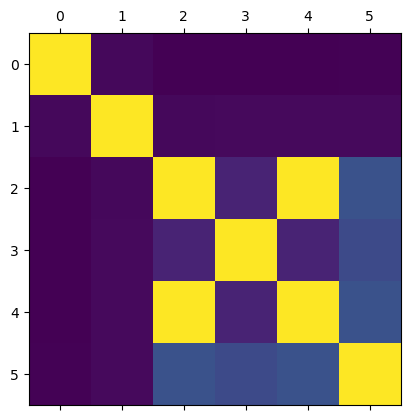

In [21]:
plt.matshow(df_renew.corr())
plt.show()

In [22]:
sub = df_renew[['YEAR', 'MONTH', 'VALUE', 'share']]

In [23]:
sub.head()

,YEAR,MONTH,VALUE,share
0,2010,1,990.728,0.047771
1,2010,1,409.469,0.019744
2,2010,1,49.216,0.002373
3,2010,1,0.083,0.000004
4,2010,1,19289.730,0.930108


In [25]:
f,ax = plt.figure(figsize=(15,12))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

TypeError: cannot unpack non-iterable Figure object

<Figure size 1500x1200 with 0 Axes>

### Scatterplot

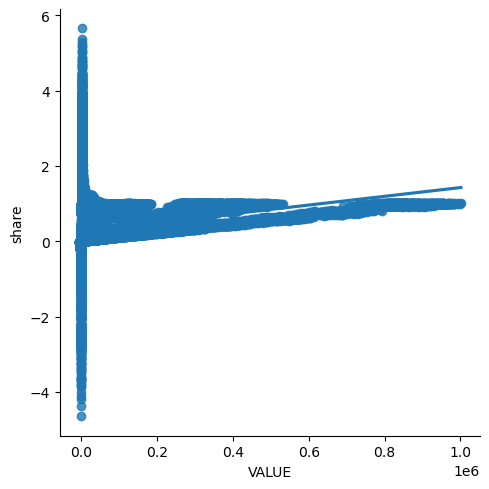

In [26]:
sns.lmplot(x = 'VALUE', y = 'share', data = df_renew)

there´s a strong positiv relation because one depends on the other

### Pair Plot

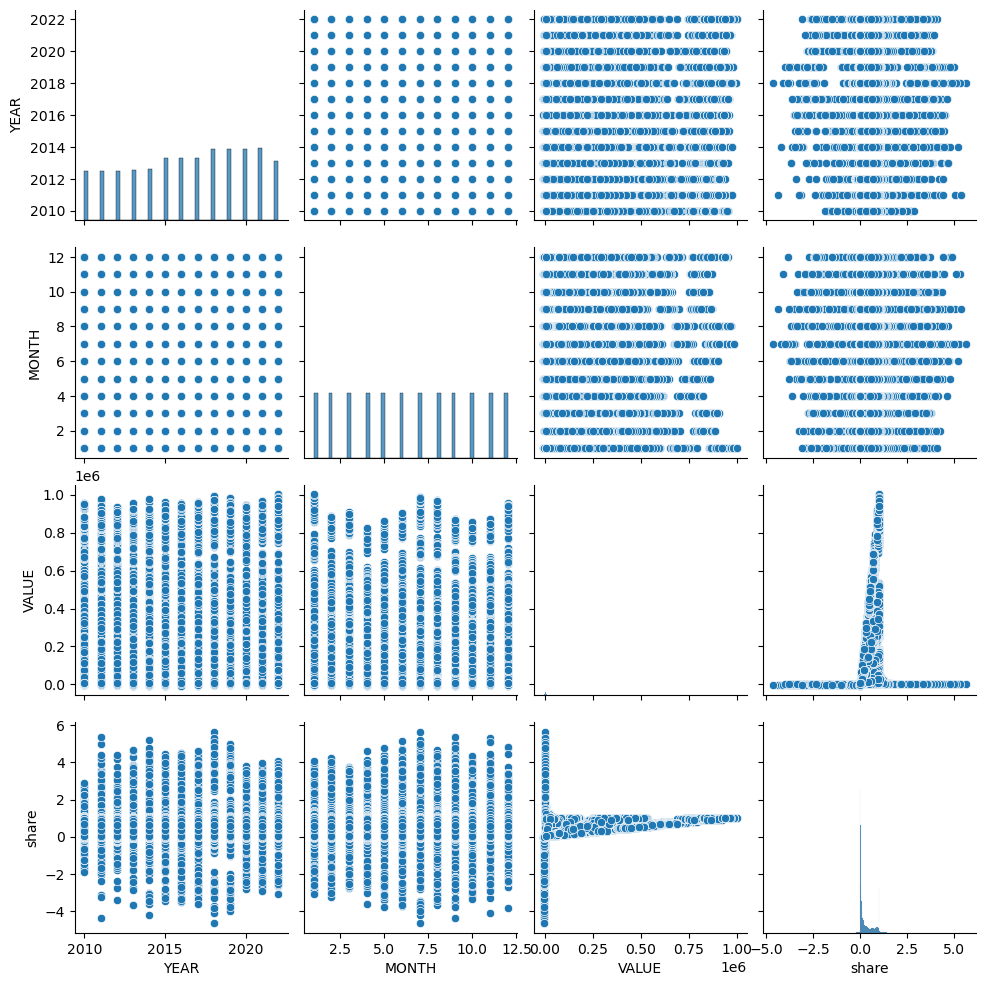

In [27]:
pp = sns.pairplot(sub)

I would like to explore the value by month under consideration of the region/ country to find out how seasonality might be involved here by region.

### Categorical Plot

<AxesSubplot:xlabel='VALUE', ylabel='Count'>

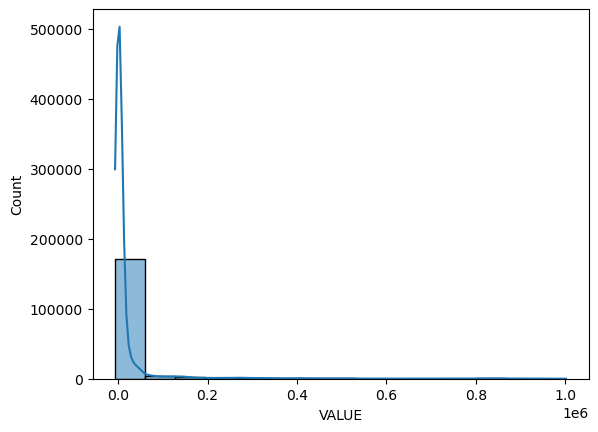

In [29]:
sns.histplot(df_renew['VALUE'], bins = 15, kde = True)

values around zero were counted the most what leads to the fact that there are no appropriate data for each country

<AxesSubplot:xlabel='PRODUCT', ylabel='Count'>

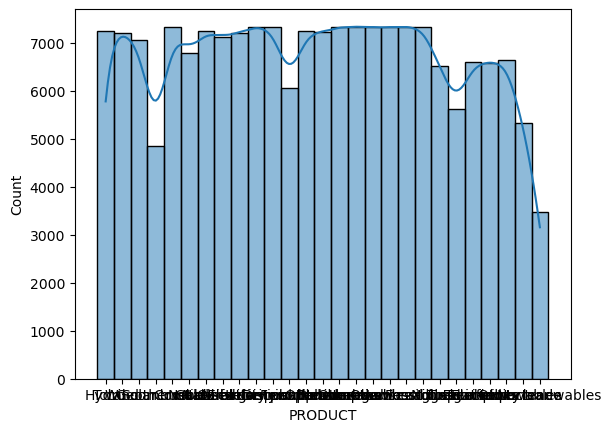

In [30]:
sns.histplot(df_renew['PRODUCT'], bins = 15, kde = True)

## Questions and hypothesis 

Hypothesis
- countries closer to the equator produce the most solar energy
- countries connected to the sea are producing the most wind energy  

I am really looking forwards to explore this data with a geomap

In [28]:
df_renew.to_csv(os.path.join(path, '02 Prepared Data', 'DF1_renew_clean.csv'))